### <font color = 'midnightblue'> **1.差分进化算法介绍** </font>
    差分进化算法（DE）： 是一种针对连续函数，基于种群的全局优化算法。该算法可以通过交叉、变异来更新向量的种群，然后在原始种群和更新后的种群中基于条件选择最合适的解。DE是一种模拟生物进化的随机模型，通过反复迭代，使得那些适应环境的个体被保存了下来，同时，DE特有的记忆能力使其可以动态跟踪当前的搜索情况，以调整其搜索策略，具有较强的全局收敛能力和稳健性，且不需要借助问题的特征信息，适于求解一些利用常规的数学规划方法所无法求解的复杂优化问题。

#### 算法步骤如下：

- 输入变量（Inputs）: 目标方程，搜索区间，种群规模，变异因子，交叉概率，迭代次数

- 1. 在给定区间内生成随机初始种群 P > 3


    
- 2. 从种群中随机抽取三个个体并产生变异个体并生成新向量



- 3. 变异个体与原始种群交叉生成测试向量



- 4. 计算目标函数值并从原始种群和测试向量中选取最优个体 

##### 自适应差分进化算法
    
    由于差分算法中变异算子和交叉概率的选择决定了最后结果的准确性和整个算法的运行效率，我们设计自适应的变异算子 F 和交叉概率 CR 来对原始算法进行改进：

<font color='blue'>
\begin{equation}
\lambda = e^{1-{\frac{G}{G + 1-i}}}
\end{equation}
</font>

其中
- $G$ = 总迭代次数
- $i$ = 当前迭代次数

<font color='blue'>
\begin{equation}
F = F_0 \cdot 2^{\lambda}
\end{equation}
</font>

在改进后的自适应差分算法中，我们使用了自适应算子。在基本的差分进化算法中，变异算子经常取常数，比较难准确确定，变异率太大，全局最优解低，变异率小，群体多样性下降，易出现‘早熟’的现象。通过上述方式设计变异算子后，在迭代开始的时候变异算子为 $2F_0$，在初期可以保持多样性，防止早熟。随着进展，变异算子降低最后变为 $F_0$，避免最优解遭到破坏。
    
    
同时，我们还可以设计一个随即范围的交叉算子使其均值为0.75并尽量保证群体的多样性：
 
<font color='blue'>
\begin{equation}
CR = 0.5 \cdot [1 + rand(0,1)]
\end{equation}
</font>

- 算法如下

```python
def main(func, bounds, popsize, mutate, CR, maxiter):

    population = [] 
    for i in range(0,popsize): 
        indv = []
        for j in range (len(bounds)):
            indv.append(random.uniform(bounds[j][0],bounds[j][1]))  
        population.append(indv) 

    for i in range(1, maxiter+1):
        
        gen_best_list = [] #store the best fitness value
        x_list = []
        #自适应变异算子操作
        lambda_f = np.exp(1 - maxiter/(maxiter + 1 - i ))
        F = mutate * (2 **lambda_f)

        gen_scores =[]
        for j in range(0,popsize):
            candidates = list(range(0,popsize)) 
            candidates.remove(j)
            random_index = random.sample(candidates,3)
            
            x_1 = population[random_index[0]]
            x_2 = population[random_index[1]]
            x_3 = population[random_index[2]]
            x_t = population[j]  #target individual
            
            x_diff = [x_2_i - x_3_i for x_2_i, x_3_i in zip(x_2,x_3)]
            v_donor = [x_1_i + F * x_diff_i for x_1_i, x_diff_i in zip(x_1,x_diff)]
            v_donor = ensure_bounds(v_donor, bounds)
            v_trial = []

            CrossOver = CR * (1+ random.random())
            
            for k in range(len(x_t)):
                rand_rate = random.random()
                rand_delta = random.randint(0,len(x_t)-1) 
                if rand_rate > CrossOver or k != rand_delta:
                    v_trial.append(x_t[k])
                else:
                    v_trial.append(v_donor[k])  
                    
            score_trial = func(v_trial)  
            score_target = func(x_t)   
 
            if score_trial < score_target:
                population[j] = v_trial 
                gen_scores.append(score_trial)
            else:
                gen_scores.append(score_target)
                
            gen_best = min(gen_scores)                                  # fitness of best individual
            gen_sol = population[gen_scores.index(min(gen_scores))]     # solution of best individual 
        
        gen_best_list.append(gen_best) 
    
    print ('差分进化算法最优值 = ', str(gen_best))
    print ('差分进化算法可行解 = ', str(gen_sol))
    
    plt.plot(x_list,gen_best_list,color = "blue",label = "DE")
    plt.xlabel("Iterstion Number")
    plt.ylabel("Fitness Value")
    plt.legend()
    plt.show()
    
    return gen_sol
```

### <font color = 'midnightblue'> **2.选择测试方程对算法进行测试** </font>

测试过程中，我们选择了三个常见的测试函数，分别是Sphere,Rastrigin和Ackley.通过运用差分进化算法来对函数求最优解，我们发现优化过程中算法有较好的稳定性，且最终结果较为精确误差极小。


***Sphere 测试函数表达式如下:***
<br/>
<font color='blue'>
\begin{equation}
\begin{aligned}
f(x_i) = \sum_{i=1}^N (x_i^2)
\end{aligned}
\end{equation}
</font>

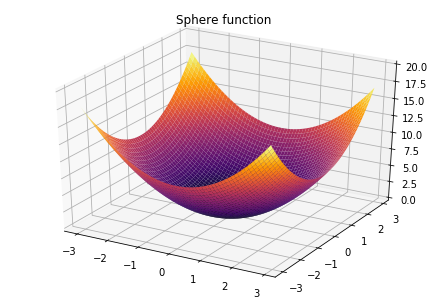

In [2]:
from IPython.display import Image
Image(filename = 'C:/Users/YUAN PUEN/Pictures/Sphere.png',width=500, height=1000)

***Rastrigin 测试函数表达式如下：***
<br/>
<font color='blue'>
\begin{equation}
\begin{aligned}
f(x_i) = 10 \cdot N +  \sum_{i=1}^N (x_i^2 - 10 \cdot \cos(2 \cdot \pi \cdot x_i) )
\end{aligned}
\end{equation}
</font>

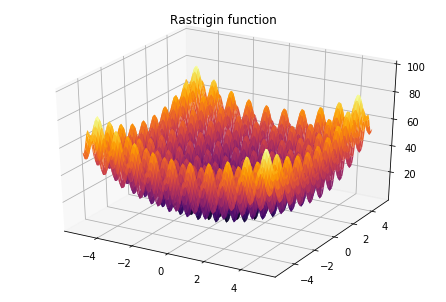

In [3]:
Image(filename = 'C:/Users/YUAN PUEN/Pictures/Rastrigin.png',width=500, height=1000)

***Ackely 测试函数表达式如下：***
<br/>
<font color='blue'>
\begin{equation}
\begin{aligned}
f(x_1,x_2) =  -20 \cdot e ^ {-0.2 \cdot {\sqrt {\frac{ x_1 ^ 2 + x_2 ^ 2}{2}}}} - e ^ {\frac{\cos(2 \pi x_1) + \cos(2 \pi x_2)}{2}} + 20 + e
\end{aligned}
\end{equation}
</font>


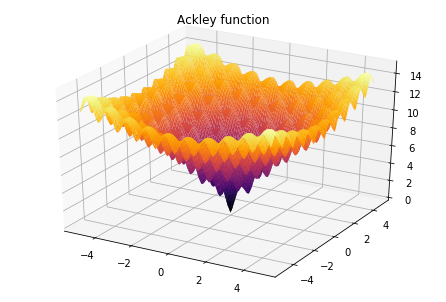

In [4]:
Image(filename = 'C:/Users/YUAN PUEN/Pictures/Ackley.png',width=500, height=1000)

**定义上述测试方程：**

In [5]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy.optimize import minimize
import DE as de
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
%matplotlib inline


In [6]:
def sphere_fun(x):
    """
    sphere function 
    global minimum = 0
    """
    return sum([x[i]**2 for i in range(len(x))])

def Ackley_testing(X):
    """
    Ackley function
    [-5,5] [-5,5]
    """
    Z = [-20 * np.exp(-0.2 * np.sqrt(0.5 * (X[0]**2 + X[1]**2))) - np.exp(0.5 * (np.cos(2 * np.pi * X[0]) + np.cos(2 * np.pi * X[1]))) + np.e + 20]
    return Z

def Rastrigin_testing(X):
    """
    (-5.12,5,12)
    global minimum : f(x)=0; x(i)=0, i=1:n.
    """
    A = 10
    Z = 2 * A + X[0] ** 2 - A * np.cos(2 * np.pi * X[0]) + X[1] ** 2 - A * np.cos(2 * np.pi * X[1])
    return Z

- 使用差分进化算法测试Sphere函数

差分进化算法最优值 =  6.358109282227462e-44
差分进化算法可行解 =  [1.9523113926580367e-22, -1.59580371860862e-22]


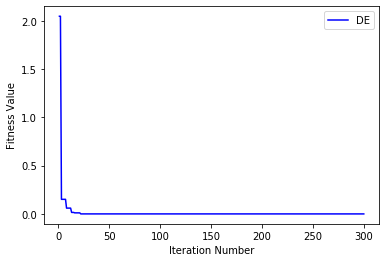

[1.9523113926580367e-22, -1.59580371860862e-22]

In [10]:
func1 = sphere_fun                         # 目标方程
bounds = [(-10,10),]*2                     # 取值区间 [(x1_min, x1_max), (x2_min, x2_max),...]
popsize = 30                               # 初始种群规模 >= 4
mutate = 0.5                               # 变异因子 [0,2]
recombination = 0.75                       # 交叉因子 [0,1]
maxiter = 300                              # 最大迭代次数

de_sphere = de.main(func1,bounds,popsize,mutate,recombination,maxiter)
de_sphere

- 使用差分进化算法测试Ackley函数

差分进化算法最优值 =  [0.0]
差分进化算法可行解 =  [4.113881696221082e-17, 3.1113916235117855e-16]


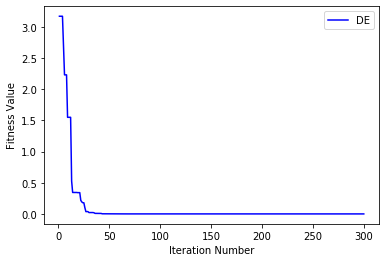

[4.113881696221082e-17, 3.1113916235117855e-16]

In [8]:
func2 = Ackley_testing                     # Objective function
bounds = [(-5,5),]*2                       # Bounds [(x1_min, x1_max), (x2_min, x2_max),...]
popsize = 30                               # Population size, must be >= 4
mutate = 0.5                               # Mutation factor [0,2]
recombination = 0.75                       # Recombination rate [0,1]
maxiter = 300                              # Max number of generations (maxiter)

de_ack = de.main(func2,bounds,popsize,mutate,recombination,maxiter)
de_ack

- 使用差分进化算法测试Rastrigin函数

差分进化算法最优值 =  0.0
差分进化算法可行解 =  [-1.1155808828371736e-09, 7.251906187878907e-10]


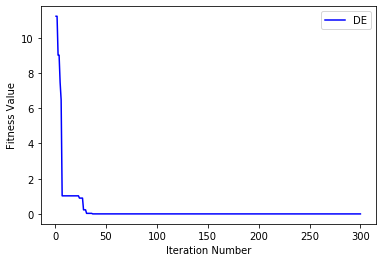

[-1.1155808828371736e-09, 7.251906187878907e-10]

In [9]:
func3 = Rastrigin_testing                  # Objective function
bounds = [(-5.12,5.12),]*2                 # Bounds [(x1_min, x1_max), (x2_min, x2_max),...]
popsize = 30                               # Population size, must be >= 4
mutate = 0.5                               # Mutation factor [0,2]
recombination = 0.75                       # Recombination rate [0,1]
maxiter = 300                              # Max number of generations (maxiter)

de_ras = de.main(func3,bounds,popsize,mutate,recombination,maxiter)
de_ras

从以上图例中可以发现DE算法在寻找测试函数的最优解时具有较高的准确性和稳定性，且效率较高。